In [1]:
#Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Data
filename = 'C necator fluorescence intensity.xlsx'
df = pd.read_excel(filename, sheet_name='Normalized fluorescence')
data = df[['Unnamed: 4','Unnamed: 5','Unnamed: 6']][1:]
data.columns = ['Name', 'Mean_norm_intensity', 'Stdev']
XX = pd.Series(list(data['Mean_norm_intensity']),index=list(data['Name']))

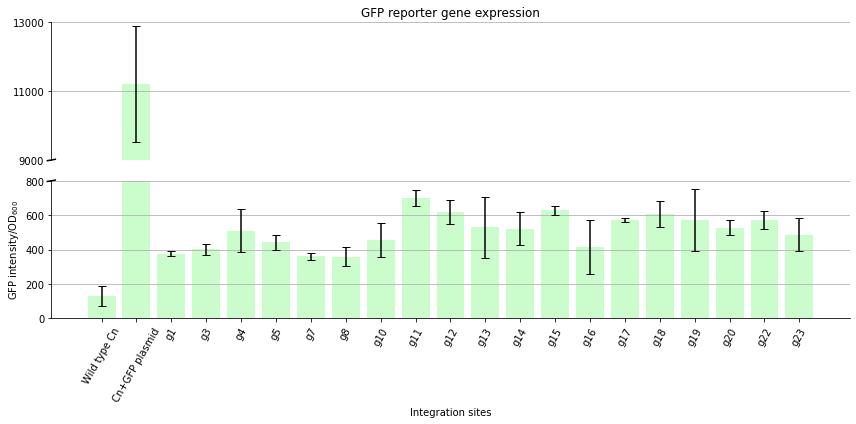

In [8]:
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True, figsize=(12,6))
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x',which='both',bottom=False)
ax2.spines['top'].set_visible(False)

bs = 800
ts = 9000

ax2.set_ylim(0,bs)
ax1.set_ylim(ts,13000)
ax1.set_yticks(np.arange(9000,13001,2000))

bars1 = ax1.bar(XX.index, XX.values, yerr = list(data['Stdev']), color = 'palegreen', capsize=4, alpha = 0.5)
bars2 = ax2.bar(XX.index, XX.values, yerr = list(data['Stdev']), color = 'palegreen', capsize=4, alpha = 0.5)

d = .005 
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)      
#ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
#ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

for tick in ax2.get_xticklabels():
    tick.set_rotation(60)

ax1.grid(axis = 'y')
ax2.grid(axis = 'y')

ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

ax2.set_ylabel('$GFP\ intensity/OD_{600}$')
#ax2.yaxis.set_label_coords(0.05, 0.6, transform=fig.transFigure)

ax2.set_xlabel('Integration sites')
ax1.set_title('GFP reporter gene expression')

plt.tight_layout()
#plt.show()
plt.savefig('Normalized GFP CN.png', dpi = 400)

In [4]:
df_od = pd.read_excel(filename, sheet_name='Raw data', header = None)

In [6]:
multiple_lists = [list(df_od[6][3:24]),list(df_od[7][3:24]),list(df_od[8][3:24])]
arrays = [np.array(x) for x in multiple_lists]
mean_OD = [np.mean(k) for k in zip(*arrays)]
std_OD = [np.std(k) for k in zip(*arrays)]
XX = pd.Series(list(data['Mean_norm_intensity']),index=list(data['Name']))
x_pos = np.arange(len(XX.index))

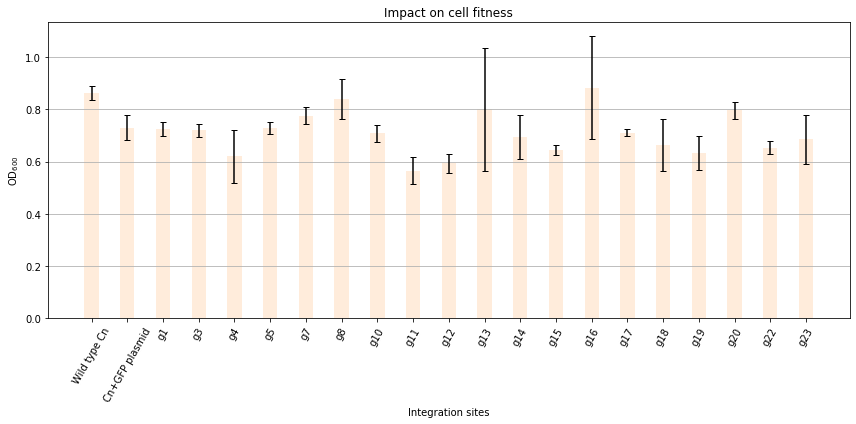

In [29]:
# Build the plot
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(XX.index, mean_OD, yerr=list(std_OD), align='center', alpha=0.5, capsize=3, color = 'peachpuff', width = 0.4)
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
ax.set_xlabel('Integration sites')
ax.set_ylabel('$OD_{600}$')
ax.set_xticks(x_pos)
ax.set_xticklabels(XX.index)
ax.set_title('Impact on cell fitness')
ax.yaxis.grid(True)

# Save the figure and show
plt.xticks(rotation=60)
plt.tight_layout()
plt.savefig('Growth CN.png', dpi = 400)
#plt.show()